# **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
from scipy.special import expit
import time
import matplotlib.pyplot as plt
from statistics import mode
from collections import Counter
from sklearn.datasets import fetch_openml
import ssl
import time

# DATA IMPORT AND DISTRUBITON

**Import Data**

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)#Get the Data Set from Sklearn Dataset
X_train = X[:60000] #X has length 70k first 60k take first 60k as train set
X_test=X[60000:70000]# Last 10 k as test set
y_train= y[:60000]# train labels
y_test=y[60000:70000]# test labels
X_train1=X_train.to_numpy()#it is in panda
X_test1=X_test.to_numpy()#convert data type to numpy
Y_test1=y_test.to_numpy()
Y_train1=y_train.to_numpy()
Y_train1=Y_train1.astype(int)#convert labels to integer
Y_test1=Y_test1.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Data frame conversion to see data distrubiton**

In [4]:
df_train=pd.DataFrame(X_train)#Panda Dataframe conversion
df_test=pd.DataFrame(X_test)
df_train_y=pd.DataFrame(data=y_train,columns=['class'])#indicates labels as class 0-9
df_test_y=pd.DataFrame(data=y_test,columns=['class'])

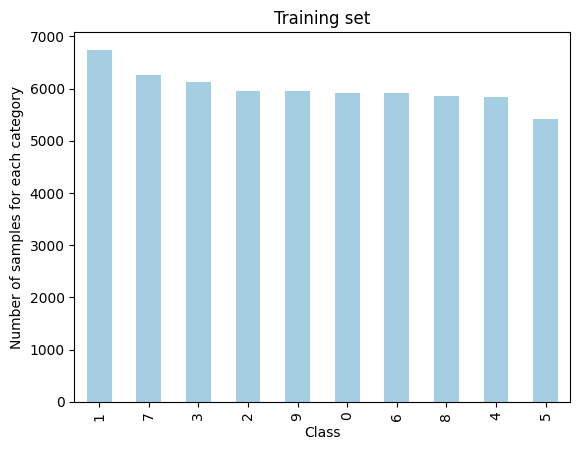

In [5]:

df_train_y['class'].value_counts().plot(kind = 'bar', colormap = 'Paired') #Plot Bar (Class distributions)
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()


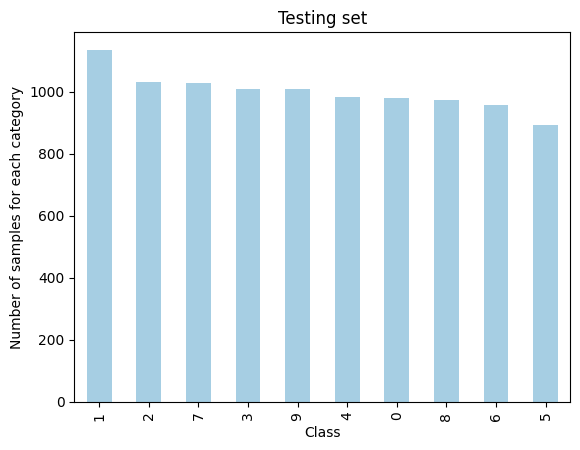

In [6]:


df_test_y['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')#Test data distributions
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

# PCA

> Blok alıntı ekle




In [7]:
#Randomly select tv data because of OVERUSE RAM may shutdown the kernel
num_samples_to_keep = 1250
indices_to_keep = np.random.choice(60000, num_samples_to_keep, replace=False)
X_train_1250 = X_train1.T[:, indices_to_keep]
Y_train_1250 = Y_train1[indices_to_keep]


In [8]:
#Same for the test data set
num_samples_to_keep = 1250
indices_to_keep2 = np.random.choice(10000, num_samples_to_keep, replace=False)
X_test_1250 = X_test1.T[:, indices_to_keep2]
Y_test_1250 = Y_test1[indices_to_keep2]

In [38]:
X_train_flat = X_train_1250.reshape(X_train1.T.shape[0], -1)#1D ARRAY OF DATA

X_test_flat = X_test_1250.reshape(X_test1.T.shape[0], -1)
print(X_train_1250.shape)

(784, 1250)


In [39]:
Train_mean=np.mean(X_train_1250,axis=1)#Mean vectors of train data
Test_mean=np.mean(X_test_1250,axis=1)#same for test data
Train_std=np.std(X_train_1250,axis=1)#variance vectors of train data
Test_std=np.std(X_test_1250,axis=1)#same for test data
Train_std_nonzero = np.nan_to_num(Train_std, nan=1.0)  # Replace NaN values with 1.0 to avoid errors
Test_std_nonzero = np.nan_to_num(Test_std, nan=1.0)  # Replace NaN values with 1.0
Train_std_nonzero[Train_std_nonzero == 0] = 1e-6
Test_std_nonzero[Test_std_nonzero == 0] = 1e-6

print(X_train_1250.shape)
print(Train_mean.shape)
print(Train_std.shape)
Stand_X_train=(X_train_1250-Train_mean[:, np.newaxis])/Train_std_nonzero[:, np.newaxis]
Stand_X_test=(X_test_1250-Test_mean[:, np.newaxis])/Test_std_nonzero[:, np.newaxis]
print(Stand_X_train.shape)

(784, 1250)
(784,)
(784,)
(784, 1250)


In [40]:
Train_cov=np.cov(Stand_X_train,rowvar=  False)#covariance matrix
Train_eigen_val,Train_eigen_vec=np.linalg.eig(Train_cov)#get the eigen values and eigen vectors
Test_cov=np.cov(Stand_X_test,rowvar=  False)#covariance matrix for test  data
Test_eigen_val,Test_eigen_vec=np.linalg.eig(Test_cov)#eigen values and vectors for test data

In [45]:
sort_index2=np.argsort(Test_eigen_val)[::-1]#Sorting the eigenvalues highest the lowest
Test_eigen_val_sorted=Train_eigen_val[sort_index2]#getting the sorted eigen values
Test_eigen_vec_sorted=Test_eigen_vec[:,sort_index2]#getting the sorted eigen vectors
Reduced_size=140#aimed principle components number
PCA_selectedTest=Test_eigen_vec_sorted[:,:Reduced_size]#first 100 Principal components
PCA_selected3=PCA_selectedTest.real#even though it doesnt have any imaginary part it shows 0i so need to convert real

In [46]:
#same steps for train data
sort_index=np.argsort(Train_eigen_val)[::-1]
Train_eigen_val_sorted=Train_eigen_val[sort_index]
Train_eigen_vec_sorted=Train_eigen_vec[:,sort_index]
Reduced_size=140
PCA_selected=Train_eigen_vec_sorted[:,:Reduced_size]
PCA_selected2=PCA_selected.real

In [30]:
Origianal_data_variance = np.var(X_train_1250, axis=1)
Origianal_data_variance=np.sum(Origianal_data_variance)
PVE_list=[]
for i in range(784):
  PCA_selected=Train_eigen_vec_sorted[:,:i]
  Projection = np.dot(Stand_X_train, PCA_selected)
  variance = np.var(Projection, axis=0)
  variance=np.sum(variance)
  PVE_list.append(variance/Origianal_data_variance)

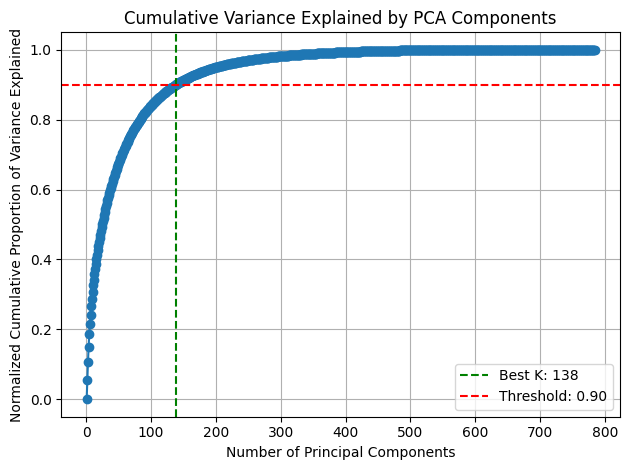

Number of components at elbow point: 138


In [14]:
max_value = np.max(PVE_list)
PVE_list_normalized = PVE_list / max_value
plt.plot(range(1, len(PVE_list_normalized) + 1), PVE_list_normalized, marker='o')
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Normalized Cumulative Proportion of Variance Explained")
plt.grid(True)
# Find the "elbow" point
elbow_point = np.sum(PVE_list_normalized<0.90)
threshold = 0.90
# Mark the elbow point on the plot
plt.axvline(x=elbow_point, color='g', linestyle='--', label=f'Best K: {elbow_point}')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()
print("Number of components at elbow point:", elbow_point)

# K-Fold


In [8]:
def train_val_split(X, y, train_ratio=0.8):
    num_samples = X.shape[0]
    num_train_samples = int(num_samples * train_ratio)
    indices = np.random.permutation(num_samples)
    train_indices = indices[:num_train_samples]
    val_indices = indices[num_train_samples:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    return X_train, y_train, X_val, y_val

def kfold_cross_validation_indices(train_indices, k):
    fold_size = len(train_indices) // k
    fold_indices = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else len(train_indices)
        val_indices_fold = train_indices[start:end]
        train_indices_fold = np.concatenate([train_indices[:start], train_indices[end:]])
        fold_indices.append((train_indices_fold, val_indices_fold))
    return fold_indices


# Split the dataset into training and validation sets
X_train, y_train, X_val, y_val = train_val_split(X.T, y, train_ratio=0.8)

# Perform K-fold cross-validation on the training set
k = 10
fold_indices = kfold_cross_validation_indices(np.arange(len(X_train)), k)
# Print indices for each fold
for i, (train_indices_fold, val_indices_fold) in enumerate(fold_indices):
    print(f"Fold {i+1}:")
    print("Train indices:", train_indices_fold)
    print("Test indices:", val_indices_fold)

Fold 1:
Train indices: [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318

# FNN

## Normal-NN

In [56]:
class FNN():
  def __init__(self,learning_rate=0.01,hidden_size=300,lambda_coef=0.01,Penalize=False,epoch=50):
        self.lr = learning_rate
        self.h_size = hidden_size  # hidden layer size
        self.l_coef = lambda_coef  # penalty coefficient
        self.penalty = Penalize  # Open penalty
        self.epoch = epoch  # number of epochs
        self.train_errors = []  # Store training errors per epoch
        self.test_errors = []  # Store test errors per epoch
        self.train_accuracies = []  # Store training accuracies per epoch
        self.test_accuracies = []  # Store test accuracies per epoch

  def fit(self,X_train,Y_train,X_test,Y_test):#fitting the dataset into neural network
    self.x_train=X_train
    self.y_train=Y_train
    self.x_test=X_test
    self.y_test=Y_test

  def initialize_weights(self,PCA=False):
    if PCA:#if PCA data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 100))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))
    else:#if raw data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 784))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))

  def relu_activation(self,x):
    return np.maximum(x, 0)#hidden layer activation function

  def sigmoid_activation(self,x):
    y = expit(x)#output layer activation function
    return y

  def desired_output(self,label):
        d = np.zeros((10,1))#one hot encoding for labels
        d[label] = 1
        return d

  def desired_output_sigmoid(self,label):
    desired = np.eye(10)[label]
    return desired

  def find_error(self,output,desired):
    error = desired - output#error calculations
    return error


  def forward_pass(self,inputs):
    hidden_inputs = np.dot(self.weights_hidden, inputs)#hidden layer forward pass
    hidden_outputs = self.relu_activation(hidden_inputs)#activation outputs for hidden layer
    final_inputs = np.dot(self.weights_output, hidden_outputs)#output layer forward pass
    final_outputs = self.sigmoid_activation(final_inputs)#outputs of the output layer
    return hidden_outputs, final_outputs


  def output_gradient(self,error,final_output):
    derivative=np.eye(10)*(final_output-final_output*final_output)
    gradient=np.dot(derivative,error)
    output_gradient=np.reshape(gradient,(10,1))#reshape the output as needed
    return output_gradient


  def relu_derivative(self,x):#derivative of relu
    x[x>=0]=1
    x[x<0]=0
    return x

  def input_gradient(self,first_output,output_gradient):

    derivative=np.eye(self.h_size)*self.relu_derivative(first_output)
    gradient=np.dot(np.dot(derivative,np.transpose(self.weights_output)),output_gradient)
    input_gradient=np.reshape(gradient,(self.h_size,1))#reshape gradient as needed
    return input_gradient

  def backpropagation(self,inputs, labels):
    hidden_outputs, final_outputs = self.forward_pass(inputs) #forward pass
    desired = self.desired_output(labels) #one hot encoded desired labels
    error = self.find_error(final_outputs, desired)#error calculations
    output_gradients = self.output_gradient(error, final_outputs)#output gradient calculations
    input_gradients = self.input_gradient( hidden_outputs, output_gradients)#input gradients using the output graidents also
    if self.penalty:#if shrinking coef (penalty) is selected
      weights_hidden_output_updated = (1-self.lr*self.l_coef)*self.weights_output + self.lr * np.dot(output_gradients,hidden_outputs.T)
      weights_input_hidden_updated = (1-self.lr*self.l_coef)*self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)
    else:#default settings
      weights_hidden_output_updated = self.weights_output + self.lr * np.dot(output_gradients, hidden_outputs.T)
      weights_input_hidden_updated = self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)

    return error, weights_hidden_output_updated, weights_input_hidden_updated

  def predict(self, batch_size):
        startTime = time.time()

        for epoch in range(self.epoch):  # train the network
            cumulativeError = 0.0
            numOfCorrectTrain = 0
            for i in range(batch_size):  # train data length
                flattened_data = np.reshape(self.x_train[i], (784, 1)) / 255  # normalize the data and reshape as needed
                error, self.weights_output, self.weights_hidden = self.backpropagation(flattened_data,
                                                                                         self.y_train[i])  # get the current error and updated weights
                cumulativeError += np.sum(error ** 2 * 0.5)
                predicted_train = np.argmax(self.forward_pass(flattened_data)[1])  # predicted class
                if predicted_train == self.y_train[i]:  # check if prediction is correct
                    numOfCorrectTrain += 1

            epochErrorMean = cumulativeError / batch_size
            self.train_errors.append(epochErrorMean)
            train_accuracy = (numOfCorrectTrain / batch_size) * 100
            self.train_accuracies.append(train_accuracy)

            cumulativeError_2 = 0.0
            numOfCorrectTest = 0
            for i in range(len(self.y_test)):  # test data predictions
                testData = np.reshape(self.x_test[i], (784, 1)) / 255  # normalize and reshape
                layer_output, final_output = self.forward_pass(testData)  # forward pass
                self.y_test[i]=self.y_test[i].astype(int)
                desired = self.desired_output(self.y_test[i])  # one hot encoded labels
                error_2 = self.find_error(final_output, desired)  # error calculations, normally its done in backpropagation function
                cumulativeError_2 += np.sum(error_2 ** 2 * 0.5)
                predicted_test = np.argmax(final_output)  # predicted class
                if predicted_test == self.y_test[i]:  # check if prediction is correct
                    numOfCorrectTest += 1
                   # print("MALENES",i)

            testSetErrorMean = (cumulativeError_2 / len(self.y_test))
            self.test_errors.append(testSetErrorMean)
            test_accuracy = (numOfCorrectTest / len(self.y_test)) * 100
            self.test_accuracies.append(test_accuracy)

        stopTime = time.time()  # training time
        print("Training Completed!\nCPU Time: ", stopTime - startTime, " seconds")

        # Print final training accuracy
        final_train_accuracy = self.train_accuracies[-1]
        print("Final Training Accuracy:", final_train_accuracy, "%")

        # Plot MSE for both training and test sets
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.epoch + 1), self.train_errors, label='Training MSE')
        plt.plot(range(1, self.epoch + 1), self.test_errors, label='Test MSE')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE Train vs Test')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, self.epoch + 1), self.train_accuracies, label='Training Accuracy')
        plt.plot(range(1, self.epoch + 1), self.test_accuracies, label='Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Accuracy Train vs Test')
        plt.legend()

        plt.tight_layout()
        plt.show()


In [60]:
class FNN():
  def __init__(self,learning_rate=0.01,hidden_size=300,lambda_coef=0.01,Penalize=False,epoch=50):
    self.lr=learning_rate
    self.h_size=hidden_size#hidden layer size
    self.l_coef=lambda_coef#penalty coefficent
    self.penalty=Penalize#Open penalty
    self.epoch=epoch#number of epochs

  def fit(self,X_train,Y_train,X_test,Y_test):#fitting the dataset into neural network
    self.x_train=X_train
    self.y_train=Y_train
    self.x_test=X_test
    self.y_test=Y_test

  def initialize_weights(self,PCA=False):
    if PCA:#if PCA data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 100))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))
    else:#if raw data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 784))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))

    return self.weights_hidden,self. weights_output

  def relu_activation(self,x):
    return np.maximum(x, 0)#hidden layer activation function

  def sigmoid_activation(self,x):
    y = expit(x)#output layer activation function
    return y

  def desired_output(self,label):
        d = np.zeros((10,1))#one hot encoding for labels
        d[label] = 1
        return d

  def desired_output_sigmoid(self,label):
    desired = np.eye(10)[label]
    return desired

  def find_error(self,output,desired):
    error = desired - output#error calculations
    return error


  def forward_pass(self,inputs):
    hidden_inputs = np.dot(self.weights_hidden, inputs)#hidden layer forward pass
    hidden_outputs = self.relu_activation(hidden_inputs)#activation outputs for hidden layer
    final_inputs = np.dot(self.weights_output, hidden_outputs)#output layer forward pass
    final_outputs = self.sigmoid_activation(final_inputs)#outputs of the output layer
    return hidden_outputs, final_outputs


  def output_gradient(self,error,final_output):
    derivative=np.eye(10)*(final_output-final_output*final_output)
    gradient=np.dot(derivative,error)
    output_gradient=np.reshape(gradient,(10,1))#reshape the output as needed
    return output_gradient


  def relu_derivative(self,x):#derivative of relu
    x[x>=0]=1
    x[x<0]=0
    return x

  def input_gradient(self,first_output,output_gradient):

    derivative=np.eye(self.h_size)*self.relu_derivative(first_output)
    gradient=np.dot(np.dot(derivative,np.transpose(self.weights_output)),output_gradient)
    input_gradient=np.reshape(gradient,(self.h_size,1))#reshape gradient as needed
    return input_gradient

  def backpropagation(self,inputs, labels):
    hidden_outputs, final_outputs = self.forward_pass(inputs) #forward pass
    desired = self.desired_output(labels) #one hot encoded desired labels
    error = self.find_error(final_outputs, desired)#error calculations
    output_gradients = self.output_gradient(error, final_outputs)#output gradient calculations
    input_gradients = self.input_gradient( hidden_outputs, output_gradients)#input gradients using the output graidents also
    if self.penalty:#if shrinking coef (penalty) is selected
      weights_hidden_output_updated = (1-self.lr*self.l_coef)*self.weights_output + self.lr * np.dot(output_gradients,hidden_outputs.T)
      weights_input_hidden_updated = (1-self.lr*self.l_coef)*self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)
    else:#default settings
      weights_hidden_output_updated = self.weights_output + self.lr * np.dot(output_gradients, hidden_outputs.T)
      weights_input_hidden_updated = self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)

    return error, weights_hidden_output_updated, weights_input_hidden_updated

  def predict(self,batch_size):
    trainingError = 0.0
    startTime = time.time()

    for epoch in range(self.epoch):#train the network
        cumulativeError = 0.0
        for i in range(batch_size):#train data length
            flattened_data = np.reshape(self.x_train[i], (784, 1)) / 255#normalize the data and reshape as needed
            error, self.weights_output, self.weights_hidden = self.backpropagation(flattened_data, self.y_train[i])#get the current error and updated weights
            cumulativeError += np.sum(error**2 * 0.5)

        epochErrorMean = cumulativeError / batch_size
        trainingError += epochErrorMean

        print("Epoch Completed: ", epoch + 1, "\nMean Squares Error of Epoch: ", epochErrorMean)#erros per epoch

    trainingErrorMean = trainingError / self.epoch
    stopTime = time.time()#training time
    print("Training Completed!\nCPU Time: ", stopTime - startTime, " seconds", "\nOverall Error:", trainingErrorMean)

    cumulativeError_2 = 0.0
    numOfMissClassification = 0

    for i in range(10000):#test data predictions
        testData = np.reshape(self.x_test[i], (784, 1)) / 255#normalize and reshape
        layer_output,final_output=self.forward_pass(testData)#forward pass
        desired=self.desired_output(self.y_test[i])#one hot encoded labels
        error_2=self.find_error(final_output,desired)#error calculations, normally its done in backprobagation function
        cumulativeError_2 += np.sum(error_2**2 * 0.5)

        predicted = np.argmax(final_output)#take the argmax to see predicted data

        if self.y_test[i] != predicted:#check prediction accuracy
            numOfMissClassification += 1

    misclasificationPercentage = numOfMissClassification / 10000 * 100

    testSetErrorMean = cumulativeError_2 / 10000

    print("Number Of Misclasification:",numOfMissClassification,"\nError Percentage: %",misclasificationPercentage,"\nTest Data Mean Square Error:",testSetErrorMean)


## Yeni Bölüm

In [41]:
class FNN():
  def __init__(self,learning_rate=0.01,hidden_size=300,lambda_coef=0.01,Penalize=False,epoch=50):
    self.lr=learning_rate
    self.h_size=hidden_size#hidden layer size
    self.l_coef=lambda_coef#penalty coefficent
    self.penalty=Penalize#Open penalty
    self.epoch=epoch#number of epochs

  def fit(self,X_train,Y_train,X_test,Y_test):#fitting the dataset into neural network
    self.x_train=X_train
    self.y_train=Y_train
    self.x_test=X_test
    self.y_test=Y_test

  def initialize_weights(self,PCA=False):
    if PCA:#if PCA data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 100))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))
    else:#if raw data selected
      self.weights_hidden = np.random.uniform(-0.01, 0.01, size=(self.h_size, 784))
      self.weights_output = np.random.uniform(-0.01, 0.01, size=(10, self.h_size))

  def relu_activation(self,x):
    return np.maximum(x, 0)#hidden layer activation function

  def sigmoid_activation(self,x):
    y = expit(x)#output layer activation function
    return y

  def desired_output(self,label):
        d = np.zeros((10,1))#one hot encoding for labels
        d[label] = 1
        return d

  def desired_output_sigmoid(self,label):
    desired = np.eye(10)[label]
    return desired

  def find_error(self,output,desired):
    error = desired - output#error calculations
    return error


  def forward_pass(self,inputs):
    hidden_inputs = np.dot(self.weights_hidden, inputs)#hidden layer forward pass
    hidden_outputs = self.relu_activation(hidden_inputs)#activation outputs for hidden layer
    final_inputs = np.dot(self.weights_output, hidden_outputs)#output layer forward pass
    final_outputs = self.sigmoid_activation(final_inputs)#outputs of the output layer
    return hidden_outputs, final_outputs


  def output_gradient(self,error,final_output):
    derivative=np.eye(10)*(final_output-final_output*final_output)
    gradient=np.dot(derivative,error)
    output_gradient=np.reshape(gradient,(10,1))#reshape the output as needed
    return output_gradient


  def relu_derivative(self,x):#derivative of relu
    x[x>=0]=1
    x[x<0]=0
    return x

  def input_gradient(self,first_output,output_gradient):

    derivative=np.eye(self.h_size)*self.relu_derivative(first_output)
    gradient=np.dot(np.dot(derivative,np.transpose(self.weights_output)),output_gradient)
    input_gradient=np.reshape(gradient,(self.h_size,1))#reshape gradient as needed
    return input_gradient

  def backpropagation(self,inputs, labels):
    hidden_outputs, final_outputs = self.forward_pass(inputs) #forward pass
    desired = self.desired_output(labels) #one hot encoded desired labels
    error = self.find_error(final_outputs, desired)#error calculations
    if self.penalty:#if shrinking coef (penalty) is selected
      output_gradients = self.output_gradient(error, final_outputs)#output gradient calculations
      weights_hidden_output_updated = (1-self.lr*self.l_coef)*self.weights_output + self.lr * np.dot(output_gradients,hidden_outputs.T)
      input_gradients = self.input_gradient( hidden_outputs, output_gradients)#input gradients using the output graidents also
      weights_input_hidden_updated = (1-self.lr*self.l_coef)*self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)
    else:#default settings
      output_gradients = self.output_gradient(error, final_outputs)#output gradient calculations
      weights_hidden_output_updated = self.weights_output + self.lr * np.dot(output_gradients, hidden_outputs.T)
      input_gradients = self.input_gradient( hidden_outputs, output_gradients)#input gradients using the output graidents also
      weights_input_hidden_updated = self.weights_hidden + self.lr * np.dot(input_gradients, inputs.T)

    return error, weights_hidden_output_updated, weights_input_hidden_updated

  def predict(self,batch_size):
    trainingError = 0.0
    startTime = time.time()

    for epoch in range(self.epoch):#train the network
        cumulativeError = 0.0
        for i in range(batch_size):#train data length
            flattened_data = np.reshape(self.x_train[i], (784, 1)) / 255#normalize the data and reshape as needed
            error, self.weights_output, self.weights_hidden = self.backpropagation(flattened_data, self.y_train[i])#get the current error and updated weights
            cumulativeError += np.sum(error**2 * 0.5)

        epochErrorMean = cumulativeError / batch_size
        trainingError += epochErrorMean

        print("Epoch Completed: ", epoch + 1, "\nMean Squares Error of Epoch: ", epochErrorMean)#erros per epoch

    trainingErrorMean = trainingError / self.epoch
    stopTime = time.time()#training time
    print("Training Completed!\nCPU Time: ", stopTime - startTime, " seconds", "\nTrain Error:", trainingErrorMean)

    cumulativeError_2 = 0.0
    numOfMissClassification = 0

    for i in range(len(self.y_test)):#test data predictions
        testData = np.reshape(self.x_test[i], (784, 1)) / 255#normalize and reshape
        layer_output,final_output=self.forward_pass(testData)#forward pass
        desired=self.desired_output(self.y_test[i])#one hot encoded labels
        error_2=self.find_error(final_output,desired)#error calculations, normally its done in backprobagation function
        cumulativeError_2 += np.sum(error_2**2 * 0.5)

        predicted = np.argmax(final_output)#take the argmax to see predicted data

        if self.y_test[i] != predicted:#check prediction accuracy
            numOfMissClassification += 1

    misclasificationPercentage = (numOfMissClassification / len(self.y_test)) * 100

    testSetErrorMean = (cumulativeError_2 /len(self.y_test))*100

    print("Number Of Misclasification:",numOfMissClassification,"\nError Percentage: %",misclasificationPercentage,"\nTest Data Mean Square Error:",testSetErrorMean)


In [65]:
def initialize_weights(hidden_size):
    weights_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, 784))
    weights_output = np.random.uniform(-0.01, 0.01, size=(10, hidden_size))

    return weights_hidden, weights_output
def initialize_weights2(hidden_size,PCA):
    weights_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, 100))
    weights_output = np.random.uniform(-0.01, 0.01, size=(10, hidden_size))

    return weights_hidden, weights_output
def relu_activation(x):
    return np.maximum(x, 0)
def sigmoid_activation(x):
    y = expit(x)
    return y
def desired_output(label,notDesiredValue):
    if notDesiredValue == -1:
        d = -np.ones((10,1))
        d[label] = 1
        return d
    else:
        d = np.zeros((10,1))
        d[label] = 1
        return d
def desired_output_sigmoid(label):
    desired = np.eye(10)[label]

    return desired
def find_error(output,desired):
    error = desired - output
    return error
def activation(x, ActivationFunction):
        return ActivationFunction(x)
def forward_pass(inputs, weights_input_hidden, weights_hidden_output, activation_hidden, activation_output):
    hidden_inputs = np.dot(weights_input_hidden, inputs)
    hidden_outputs = activation(hidden_inputs, activation_hidden)
    final_inputs = np.dot(weights_hidden_output, hidden_outputs)
    final_outputs = activation(final_inputs, activation_output)
    return hidden_outputs, final_outputs
def output_gradient(error,final_output):
    derivative=np.eye(10)*(final_output-final_output*final_output)
    gradient=np.dot(derivative,error)
    output_gradient=np.reshape(gradient,(10,1))
    return output_gradient
def relu_derivative(x):
    x[x>=0]=1
    x[x<0]=0
    return x
def desired_output_tanh(label,notDesiredValue):
    if notDesiredValue == -1:
        d = -np.ones((10,1))
        d[label] = 1
        return d
    else:
        d = np.zeros((10,1))
        d[label] = 1
        return d

def input_gradient(layer_num,first_output,output_gradient,weight_output):
    derivative=np.eye(layer_num)*relu_derivative(first_output)
    gradient=np.dot(np.dot(derivative,np.transpose(weight_output)),output_gradient)
    input_gradient=np.reshape(gradient,(layer_num,1))
    return input_gradient
def backpropagation_sigmoid(inputs, labels, weights_hidden_output, weights_input_hidden, activation_hidden, activation_output, learning_rate, layer_num):
    hidden_outputs, final_outputs = forward_pass(inputs, weights_input_hidden, weights_hidden_output, activation_hidden, activation_output)
    desired = desired_output(labels, 0)
    error = find_error(final_outputs, desired)
    output_gradients = output_gradient(error, final_outputs)
    weights_hidden_output_updated = weights_hidden_output + learning_rate * np.dot(output_gradients, hidden_outputs.T)
    input_gradients = input_gradient(layer_num, hidden_outputs, output_gradients, weights_hidden_output)
    weights_input_hidden_updated = weights_input_hidden + learning_rate * np.dot(input_gradients, inputs.T)

    return error, weights_hidden_output_updated, weights_input_hidden_updated
def train2(inputs, labels,test_images ,test_label,weights_hidden_output, weights_input_hidden, activation_hidden, activation_output, learning_rate, layer_num, batch_size, epochs):
    trainingError = 0.0
    startTime = time.time()

    for epoch in range(epochs):
        cumulativeError = 0.0

        for i in range(batch_size):
            flattened_data = np.reshape(inputs[i], (784, 1)) / 255
            error, weights_hidden_output, weights_input_hidden = backpropagation_sigmoid(flattened_data, labels[i], weights_hidden_output, weights_input_hidden, activation_hidden, activation_output, learning_rate, layer_num)
            cumulativeError += np.sum(error**2 * 0.5)

        epochErrorMean = cumulativeError / batch_size
        trainingError += epochErrorMean

        print("Epoch Completed: ", epoch + 1, "\nMean Squares Error of Epoch: ", epochErrorMean)

    trainingErrorMean = trainingError / epochs
    stopTime = time.time()
    print("Training Completed!\nCPU Time: ", stopTime - startTime, " seconds", "\nOverall Error:", trainingErrorMean)

    cumulativeError_2 = 0.0
    numOfMissClassification = 0

    for i in range(10000):
        testData = np.reshape(test_images[i], (784, 1)) / 255
        layer_output,final_output=forward_pass(testData, weights_input_hidden, weights_hidden_output,activation_hidden, activation_output)
        desired=desired_output_tanh(test_label[i],0)
        error_2=find_error(final_output,desired)
        cumulativeError_2 += np.sum(error_2**2 * 0.5)

        predicted = np.argmax(final_output)

        if test_label[i] != predicted:
            numOfMissClassification += 1

    misclasificationPercentage = numOfMissClassification / 10000 * 100

    testSetErrorMean = cumulativeError_2 / 10000

    print("Number Of Misclasification:",numOfMissClassification,"\nError Percentage: %",misclasificationPercentage,"\nTest Data Mean Square Error:",testSetErrorMean)


weights_hidden, weights_output=initialize_weights(300)
activation_hidden_1= relu_activation
activation_output_1= sigmoid_activation
weights_hidden, weights_output=initialize_weights(300)
learning_rate=0.01
epochs=50
batch_size=1250
layer_num=300
train2(X_train_1250.T,Y_train_1250,X_test1,Y_test1,weights_output, weights_hidden,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)


Epoch Completed:  1 
Mean Squares Error of Epoch:  0.5488323269001004
Epoch Completed:  2 
Mean Squares Error of Epoch:  0.45866242656023626
Epoch Completed:  3 
Mean Squares Error of Epoch:  0.45156685605940877
Epoch Completed:  4 
Mean Squares Error of Epoch:  0.42874679778220043
Epoch Completed:  5 
Mean Squares Error of Epoch:  0.3801141676569861
Epoch Completed:  6 
Mean Squares Error of Epoch:  0.31873267405064887
Epoch Completed:  7 
Mean Squares Error of Epoch:  0.26789460466727266
Epoch Completed:  8 
Mean Squares Error of Epoch:  0.2306915242089131
Epoch Completed:  9 
Mean Squares Error of Epoch:  0.20559668044995852
Epoch Completed:  10 
Mean Squares Error of Epoch:  0.18688361181208607
Epoch Completed:  11 
Mean Squares Error of Epoch:  0.17126219770766546
Epoch Completed:  12 
Mean Squares Error of Epoch:  0.15746449743061716
Epoch Completed:  13 
Mean Squares Error of Epoch:  0.14468784501566312
Epoch Completed:  14 
Mean Squares Error of Epoch:  0.13201737269973776
Epoc

# Yeni Bölüm

In [31]:
import numpy as np
from scipy.special import expit  # Sigmoid function
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class NeuralNetwork_K:
    def __init__(self, input_size=784, hidden_size=300, output_size=10, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)
        return np.sum(error**2), np.argmax(final_outputs) == label

    def train(self, X_train, Y_train):
        total_error = 0
        correct_count = 0
        i=0
        for inputs, label in zip(X_train, Y_train):
            error, correct = self.backpropagation(inputs[:, np.newaxis], label)
            total_error += error
            correct_count += correct
        return total_error / len(X_train), correct_count / len(Y_train)

    def test(self, X_test, Y_test):
        total_error = 0
        correct_count = 0
        for inputs, label in zip(X_test, Y_test):
            _, predictions = self.forward_pass(inputs[:, np.newaxis])
            desired = self.desired_output(label)
            total_error += np.sum(self.find_error(predictions, desired)**2)
            correct_count += np.argmax(predictions) == label
        return total_error / len(X_test), correct_count / len(Y_test)

def k_fold_cross_validation(X, Y, k=5, epochs=50):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold = 0
    train_errors, test_errors = [], []
    train_accuracies, test_accuracies = [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index]/255, X[test_index]/255
        Y_train, Y_test = Y[train_index], Y[test_index]


        nn = NeuralNetwork_K(input_size=784, hidden_size=300, output_size=10, learning_rate=0.01)
        for _ in range(epochs):
            train_error, train_accuracy = nn.train(X_train, Y_train)
            test_error, test_accuracy = nn.test(X_test, Y_test)

        train_errors.append(train_error)
        test_errors.append(test_error)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        fold += 1
        print(f"Fold {fold}: Train Error: {train_error}, Test Error: {test_error}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}")
        print(f'\rEpoch {epoch+1} Completed with average error {total_error / len(X_train):.3f},')

    # Plotting MSE
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, k+1), train_errors, label='Train MSE')
    plt.plot(range(1, k+1), test_errors, label='Test MSE')
    plt.xlabel('Fold Number')
    plt.ylabel('MSE')
    plt.title('k-Fold Cross-Validation MSE')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, k+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, k+1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.title('k-Fold Cross-Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming X and Y are your dataset matrices where each row is an example

In [16]:
import numpy as np
from scipy.special import expit  # Sigmoid function
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class NeuralNetwork_K:
    def __init__(self, input_size=784, hidden_size=300, output_size=10, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)
        return np.sum(error**2), np.argmax(final_outputs) == label

    def train(self, X_train, Y_train):
        total_error = 0
        correct_count = 0
        i=0
        for inputs, label in zip(X_train, Y_train):
            error, correct = self.backpropagation(inputs[:, np.newaxis], label)
            total_error += error
            correct_count += correct
        return total_error / len(X_train), correct_count / len(Y_train)

    def test(self, X_test, Y_test):
        total_error = 0
        correct_count = 0
        for inputs, label in zip(X_test, Y_test):
            _, predictions = self.forward_pass(inputs[:, np.newaxis])
            desired = self.desired_output(label)
            total_error += np.sum(self.find_error(predictions, desired)**2)
            correct_count += np.argmax(predictions) == label
        return total_error / len(X_test), correct_count / len(Y_test)

def k_fold_cross_validation(X, Y, k=5, epochs=50,input_size=784):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold = 0
    train_errors, test_errors = [], []
    train_accuracies, test_accuracies = [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index]/255, X[test_index]/255
        Y_train, Y_test = Y[train_index], Y[test_index]


        nn = NeuralNetwork_K(input_size, hidden_size=300, output_size=10, learning_rate=0.01)
        for _ in range(epochs):
            train_error, train_accuracy = nn.train(X_train, Y_train)
            test_error, test_accuracy = nn.test(X_test, Y_test)

        train_errors.append(train_error)
        test_errors.append(test_error)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        fold += 1
        print(f"Fold {fold}: Train Error: {train_error}, Test Error: {test_error}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}")
    # Plotting MSE
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, k+1), train_errors, label='Train MSE')
    plt.plot(range(1, k+1), test_errors, label='Test MSE')
    plt.xlabel('Fold Number')
    plt.ylabel('MSE')
    plt.title('k-Fold Cross-Validation MSE')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, k+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, k+1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.title('k-Fold Cross-Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming X and Y are your dataset matrices where each row is an example

In [1]:
import numpy as np
from scipy.special import expit  # Sigmoid function
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class NeuralNetwork_K2:
    def __init__(self, input_size=140, hidden_size=300, output_size=10, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)
        return np.sum(error**2), np.argmax(final_outputs) == label

    def train(self, X_train, Y_train):
        total_error = 0
        correct_count = 0
        i=0
        for inputs, label in zip(X_train, Y_train):
            error, correct = self.backpropagation(inputs[:, np.newaxis], label)
            total_error += error
            correct_count += correct
        return total_error / len(X_train), correct_count / len(Y_train)

    def test(self, X_test, Y_test):
        total_error = 0
        correct_count = 0
        for inputs, label in zip(X_test, Y_test):
            _, predictions = self.forward_pass(inputs[:, np.newaxis])
            desired = self.desired_output(label)
            total_error += np.sum(self.find_error(predictions, desired)**2)
            correct_count += np.argmax(predictions) == label
        return total_error / len(X_test), correct_count / len(Y_test)

def k_fold_cross_validation2(X, Y, k=5, epochs=50,input_size=140):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold = 0
    train_errors, test_errors = [], []
    train_accuracies, test_accuracies = [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index]/255, X[test_index]/255
        Y_train, Y_test = Y[train_index], Y[test_index]


        nn = NeuralNetwork_K(input_size, hidden_size=300, output_size=10, learning_rate=0.01)
        for _ in range(epochs):
            train_error, train_accuracy = nn.train(X_train, Y_train)
            test_error, test_accuracy = nn.test(X_test, Y_test)

        train_errors.append(train_error)
        test_errors.append(test_error)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        fold += 1
        print(f"Fold {fold}: Train Error: {train_error}, Test Error: {test_error}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}")
    # Plotting MSE
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, k+1), train_errors, label='Train MSE')
    plt.plot(range(1, k+1), test_errors, label='Test MSE')
    plt.xlabel('Fold Number')
    plt.ylabel('MSE')
    plt.title('k-Fold Cross-Validation MSE')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, k+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, k+1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.title('k-Fold Cross-Validation Accuracy')
    plt.legend()
    plt.show()

# Assuming X and Y are your dataset matrices where each row is an example

In [34]:
class NeuralNetwork:
    def __init__(self, input_size=784, hidden_size=300, output_size=10, learning_rate=0.01, epochs=50, batch_size=1250):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))
        self.train_errors = []
        self.test_errors = []
        self.train_accuracies = []
        self.test_accuracies = []

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)

        return np.sum(error**2)

    def train(self, X_train, Y_train, X_test, Y_test):
       for epoch in range(self.epochs):
        total_error = 0
        num_correct = 0
        print(f'Epoch {epoch + 1} Progessing', end='')
        for i in range(len(X_train)):
            if i % 125 == 0:
                print(".", end="")
            inputs = np.reshape(X_train[i], (784, 1)) / 255
            label = Y_train[i]
            total_error += self.backpropagation(inputs, label)

        # Calculate training accuracy
        train_accuracy = self.test_accuracy(X_train, Y_train)

        # Calculate testing accuracy and error
        test_error, test_accuracy = self.test(X_test, Y_test)

        self.train_errors.append(total_error / len(X_train))  # Append error for the epoch
        self.test_errors.append(test_error)  # Append test error as-is
        self.train_accuracies.append(train_accuracy)
        self.test_accuracies.append(test_accuracy)

        print(f'\rEpoch {epoch+1} Completed with average error {total_error / len(X_train):.3f}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}')

    def train2(self, X_train, Y_train, X_test, Y_test):
       for epoch in range(self.epochs):
        total_error = 0
        num_correct = 0
        print(f'Epoch {epoch + 1} Progessing', end='')
        for i in range(len(X_train)):
            if i % 125 == 0:
                print(".", end="")
            inputs = np.reshape(X_train[i], (140, 1)) / 255
            label = Y_train[i]
            total_error += self.backpropagation(inputs, label)

        # Calculate training accuracy
        train_accuracy = self.test_accuracy(X_train, Y_train)

        # Calculate testing accuracy and error
        test_error, test_accuracy = self.test(X_test, Y_test)

        self.train_errors.append(total_error / len(X_train))  # Append error for the epoch
        self.test_errors.append(test_error)  # Append test error as-is
        self.train_accuracies.append(train_accuracy)
        self.test_accuracies.append(test_accuracy)

        print(f'\rEpoch {epoch+1} Completed with average error {total_error / len(X_train):.3f}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}')



    def test(self, X_test, Y_test):
        total_error = 0
        num_correct = 0
        for i in range(len(X_test)):
            inputs = X_test[i]
            label = Y_test[i]
            _, predictions = self.forward_pass(inputs)
            predicted_label = np.argmax(predictions)
            if predicted_label == label:
                num_correct += 1
            total_error += np.sum(self.find_error(predictions, self.desired_output(label)))

        accuracy = num_correct / len(Y_test)
        return total_error/len(Y_test), accuracy

    def test_accuracy(self, X, Y):
        num_correct = 0
        for i in range(len(X)):
            inputs = X[i]
            label = Y[i]
            _, predictions = self.forward_pass(inputs)
            predicted_label = np.argmax(predictions)
            if predicted_label == label:
                num_correct += 1
        accuracy = num_correct / len(Y)
        return accuracy

    def plot_errors_accuracies(self):
        plt.figure(figsize=(14, 7))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.epochs+1), self.train_errors, label='Train Error')
        plt.plot(range(1, self.epochs+1), self.test_errors, label='Test Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error vs. Epoch')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, self.epochs+1), self.train_accuracies, label='Train Accuracy')
        plt.plot(range(1, self.epochs+1), self.test_accuracies, label='Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epoch')
        plt.legend()

        plt.show()

# Example instantiation and use of the class

# Assuming X_train, Y_train, X_test, Y_test are already defined and preprocessed
y_test=y_test.astype(int)


In [21]:
class NeuralNetwork2:
    def __init__(self, input_size=140, hidden_size=300, output_size=10, learning_rate=0.01, epochs=50, batch_size=1250):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))
        self.train_errors = []
        self.test_errors = []
        self.train_accuracies = []
        self.test_accuracies = []

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)

        return np.sum(error**2)

    def train(self, X_train, Y_train, X_test, Y_test):
       for epoch in range(self.epochs):
        total_error = 0
        num_correct = 0
        print(f'Epoch {epoch + 1} Progessing', end='')
        for i in range(len(X_train)):
            if i % 125 == 0:
                print(".", end="")
            inputs = np.reshape(X_train[i], (140, 1)) / 255
            label = Y_train[i]
            total_error += self.backpropagation(inputs, label)

        # Calculate training accuracy
        train_accuracy = self.test_accuracy(X_train, Y_train)

        # Calculate testing accuracy and error
        test_error, test_accuracy = self.test(X_test, Y_test)

        self.train_errors.append(total_error / len(X_train))  # Append error for the epoch
        self.test_errors.append(test_error)  # Append test error as-is
        self.train_accuracies.append(train_accuracy)
        self.test_accuracies.append(test_accuracy)

        print(f'\rEpoch {epoch+1} Completed with average error {total_error / len(X_train):.3f}, Train Accuracy: %{train_accuracy*100:.3f}, Test Accuracy: %{test_accuracy*100:.3f}')


    def test(self, X_test, Y_test):
        total_error = 0
        num_correct = 0
        for i in range(len(X_test)):
            inputs = X_test[i]
            label = Y_test[i]
            _, predictions = self.forward_pass(inputs)
            predicted_label = np.argmax(predictions)
            if predicted_label == label:
                num_correct += 1
            total_error += np.sum(self.find_error(predictions, self.desired_output(label)))

        accuracy = num_correct / len(Y_test)
        return total_error/len(Y_test), accuracy

    def test_accuracy(self, X, Y):
        num_correct = 0
        for i in range(len(X)):
            inputs = X[i]
            label = Y[i]
            _, predictions = self.forward_pass(inputs)
            predicted_label = np.argmax(predictions)
            if predicted_label == label:
                num_correct += 1
        accuracy = num_correct / len(Y)
        return accuracy

    def plot_errors_accuracies(self):
        plt.figure(figsize=(14, 7))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.epochs+1), self.train_errors, label='Train Error')
        plt.plot(range(1, self.epochs+1), self.test_errors, label='Test Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error vs. Epoch')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, self.epochs+1), self.train_accuracies, label='Train Accuracy')
        plt.plot(range(1, self.epochs+1), self.test_accuracies, label='Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epoch')
        plt.legend()

        plt.show()

# Example instantiation and use of the class

## lr=0.01 N= 300


## lr=0.05 N= 300


## lr=0.09 N= 300


##lr=0.01 N= 500

##lr=0.05 N= 500

##lr=0.09 N= 500

# TRAINN111!!

Fold 1: Train Error: 0.058425348213841724, Test Error: 0.22879746507593995, Train Accuracy: %97.700, Test Accuracy: %86.800
Fold 2: Train Error: 0.06502119587983457, Test Error: 0.197853207689361, Train Accuracy: %96.800, Test Accuracy: %89.600
Fold 3: Train Error: 0.06264682731175081, Test Error: 0.17918826893932496, Train Accuracy: %97.000, Test Accuracy: %89.600
Fold 4: Train Error: 0.06466806025471111, Test Error: 0.17318819097523788, Train Accuracy: %96.700, Test Accuracy: %90.000
Fold 5: Train Error: 0.05966735674158264, Test Error: 0.19708666355660237, Train Accuracy: %97.100, Test Accuracy: %90.000


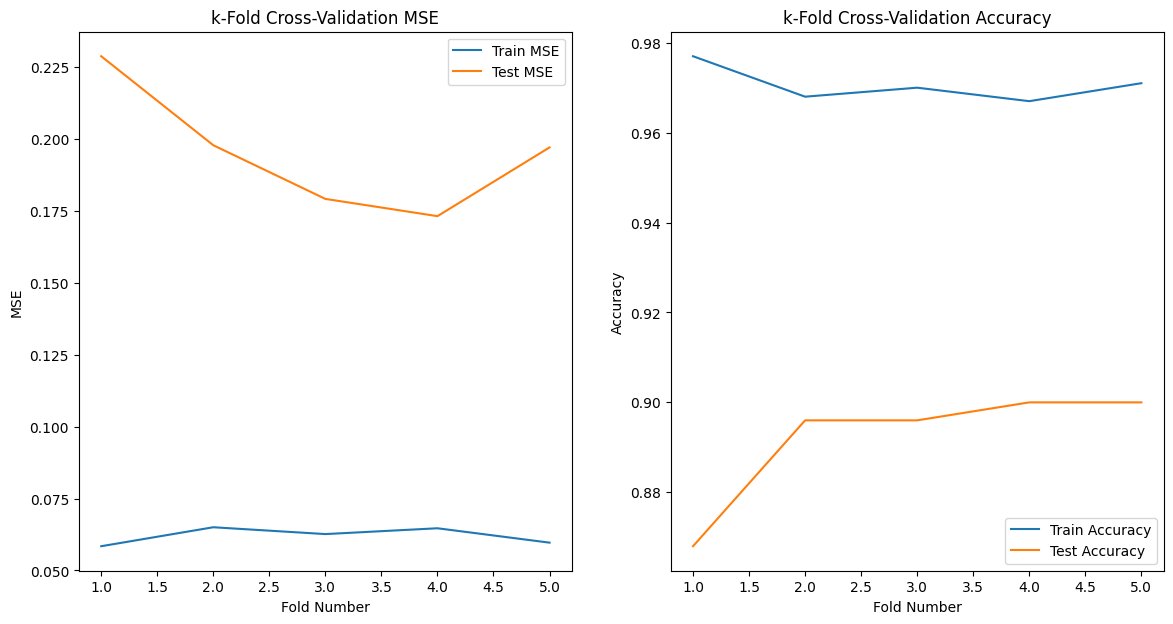

In [179]:
k_fold_cross_validation(X_train_1250.T, Y_train_1250,k=5)

Fold 1: Train Error: 0.054325971309568344, Test Error: 0.23534638531648766, Train Accuracy: %97.422, Test Accuracy: %85.600
Fold 2: Train Error: 0.057761561876268214, Test Error: 0.20325894115400525, Train Accuracy: %97.244, Test Accuracy: %88.800
Fold 3: Train Error: 0.06325950727102198, Test Error: 0.13419809805918295, Train Accuracy: %96.978, Test Accuracy: %96.000
Fold 4: Train Error: 0.05769141660871012, Test Error: 0.24785020269294597, Train Accuracy: %96.978, Test Accuracy: %86.400
Fold 5: Train Error: 0.062060695642561996, Test Error: 0.17953780696866456, Train Accuracy: %96.978, Test Accuracy: %89.600
Fold 6: Train Error: 0.05742099478986559, Test Error: 0.18262123092449772, Train Accuracy: %97.422, Test Accuracy: %89.600
Fold 7: Train Error: 0.05887950280708101, Test Error: 0.17134961947255828, Train Accuracy: %97.156, Test Accuracy: %89.600
Fold 8: Train Error: 0.059973424548445814, Test Error: 0.14882633616916233, Train Accuracy: %97.156, Test Accuracy: %91.200
Fold 9: Trai

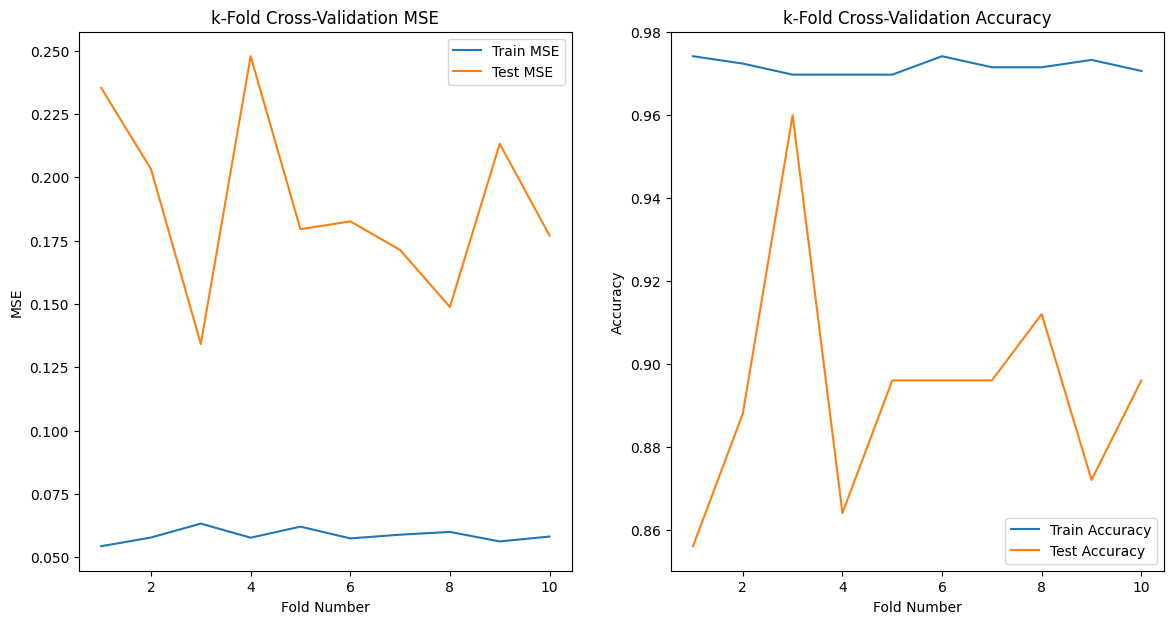

In [180]:
k_fold_cross_validation(X_train_1250.T, Y_train_1250,k=10)


Fold 1: Train Error: 0.05624957026990725, Test Error: 0.26448441656091715, Train Accuracy: %97.051, Test Accuracy: %82.540
Fold 2: Train Error: 0.05511445585059567, Test Error: 0.24522241311119553, Train Accuracy: %97.557, Test Accuracy: %84.127
Fold 3: Train Error: 0.06019360938772982, Test Error: 0.13088617243763445, Train Accuracy: %96.799, Test Accuracy: %92.063
Fold 4: Train Error: 0.0580429261566968, Test Error: 0.2194658062575814, Train Accuracy: %96.883, Test Accuracy: %87.302
Fold 5: Train Error: 0.057688481701275426, Test Error: 0.14577521636002005, Train Accuracy: %97.388, Test Accuracy: %93.651
Fold 6: Train Error: 0.05941925876669978, Test Error: 0.15188070629382194, Train Accuracy: %97.136, Test Accuracy: %93.651
Fold 7: Train Error: 0.05711419200632698, Test Error: 0.23801921388538833, Train Accuracy: %96.967, Test Accuracy: %84.127
Fold 8: Train Error: 0.05700333961370382, Test Error: 0.19448287657861157, Train Accuracy: %97.136, Test Accuracy: %90.476
Fold 9: Train Err

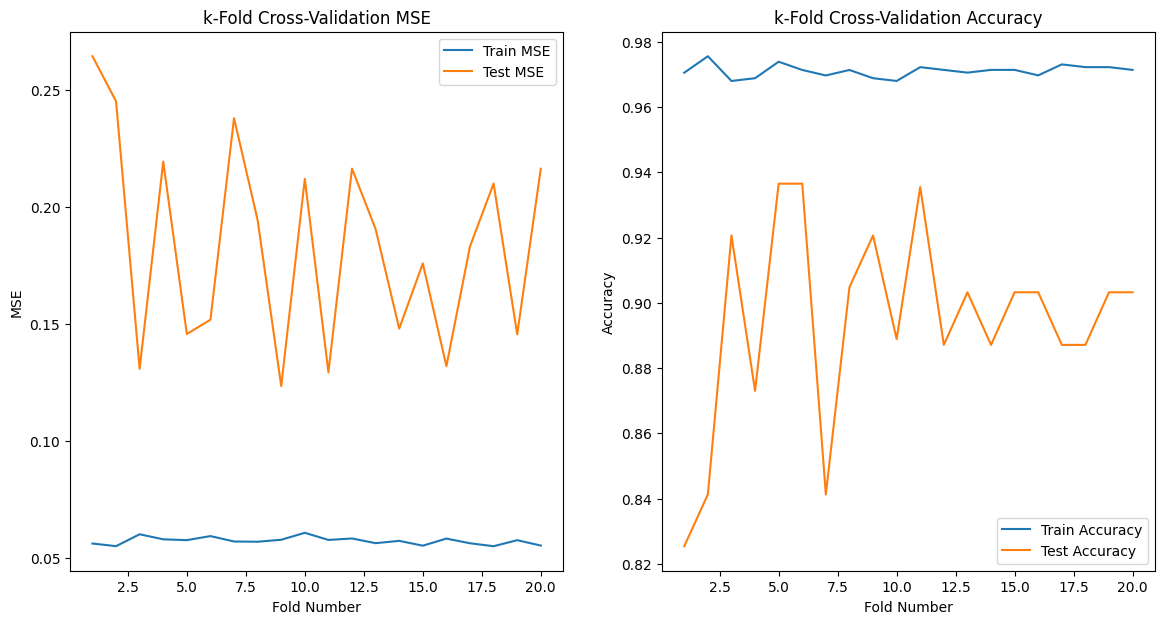

In [181]:
k_fold_cross_validation(X_train_1250.T, Y_train_1250,k=20)


Fold 1: Train Error: 0.05657907766193195, Test Error: 0.20228241413807516, Train Accuracy: %97.333, Test Accuracy: %88.000
Fold 2: Train Error: 0.05182822174838371, Test Error: 0.35625432834150816, Train Accuracy: %97.583, Test Accuracy: %78.000
Fold 3: Train Error: 0.05555133574760101, Test Error: 0.15558235306852844, Train Accuracy: %97.500, Test Accuracy: %94.000
Fold 4: Train Error: 0.059139811202615473, Test Error: 0.12134415488415927, Train Accuracy: %96.833, Test Accuracy: %92.000
Fold 5: Train Error: 0.055034156102913144, Test Error: 0.2653518956152421, Train Accuracy: %97.250, Test Accuracy: %84.000
Fold 6: Train Error: 0.056404385611473866, Test Error: 0.1581734187500686, Train Accuracy: %97.167, Test Accuracy: %92.000
Fold 7: Train Error: 0.059357368752093555, Test Error: 0.09994134153222844, Train Accuracy: %97.167, Test Accuracy: %98.000
Fold 8: Train Error: 0.05589318769961944, Test Error: 0.27274868279910525, Train Accuracy: %97.083, Test Accuracy: %82.000
Fold 9: Train 

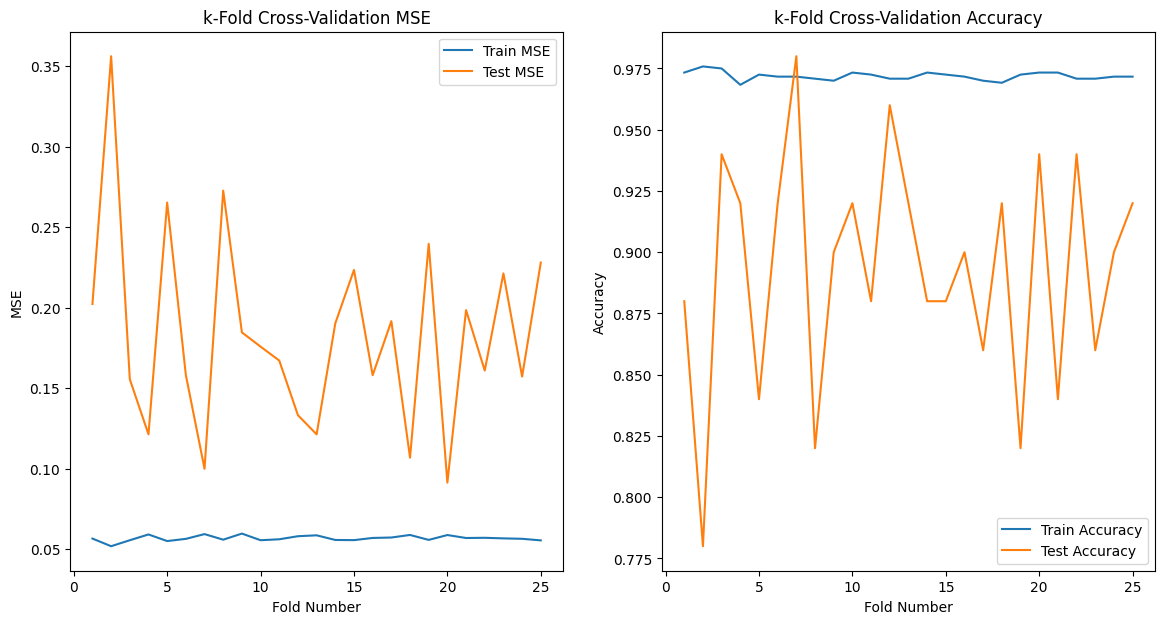

In [182]:
k_fold_cross_validation(X_train_1250.T, Y_train_1250,k=25)


Fold 1: Train Error: 2.4999996690047275, Test Error: 2.499999640001616, Train Accuracy: %11.100, Test Accuracy: %11.200
Fold 2: Train Error: 2.499999801936224, Test Error: 2.4999997820677504, Train Accuracy: %11.700, Test Accuracy: %10.800
Fold 3: Train Error: 2.5000000179656925, Test Error: 2.5000000323038476, Train Accuracy: %15.000, Test Accuracy: %11.600
Fold 4: Train Error: 2.5000000145844936, Test Error: 2.500000020656749, Train Accuracy: %8.900, Test Accuracy: %10.000
Fold 5: Train Error: 2.499999969642115, Test Error: 2.500000030880803, Train Accuracy: %9.200, Test Accuracy: %8.800


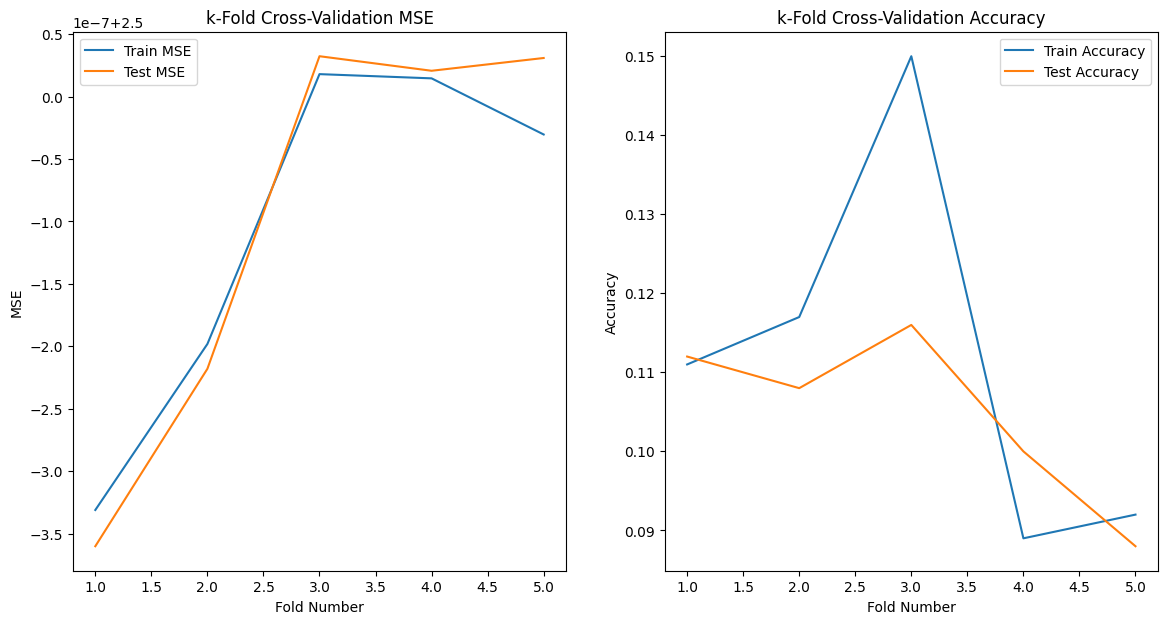

In [37]:
k_fold_cross_validation2(PCA_selected2, Y_train_1250,input_size=100)


In [ ]:
k_fold_cross_validation(PCA_selected2.T, Y_train_1250,input_size=140)


In [ ]:
k_fold_cross_validation(PCA_selected2.T, Y_train_1250,input_size=140)


In [ ]:
k_fold_cross_validation(PCA_selected2.T, Y_train_1250,input_size=140)

Epoch 1 Completed with average error 0.897, Train Accuracy: %41.600, Test Accuracy: %36.000
Epoch 2 Completed with average error 0.526, Train Accuracy: %75.120, Test Accuracy: %70.000
Epoch 3 Completed with average error 0.339, Train Accuracy: %84.800, Test Accuracy: %79.040
Epoch 4 Completed with average error 0.245, Train Accuracy: %90.720, Test Accuracy: %85.120
Epoch 5 Completed with average error 0.175, Train Accuracy: %92.240, Test Accuracy: %86.160
Epoch 6 Completed with average error 0.140, Train Accuracy: %93.280, Test Accuracy: %86.800
Epoch 7 Completed with average error 0.116, Train Accuracy: %94.240, Test Accuracy: %87.600
Epoch 8 Completed with average error 0.099, Train Accuracy: %95.040, Test Accuracy: %88.000
Epoch 9 Completed with average error 0.086, Train Accuracy: %95.600, Test Accuracy: %88.480
Epoch 10 Completed with average error 0.074, Train Accuracy: %96.080, Test Accuracy: %89.040
Epoch 11 Completed with average error 0.064, Train Accuracy: %96.480, Test Accu

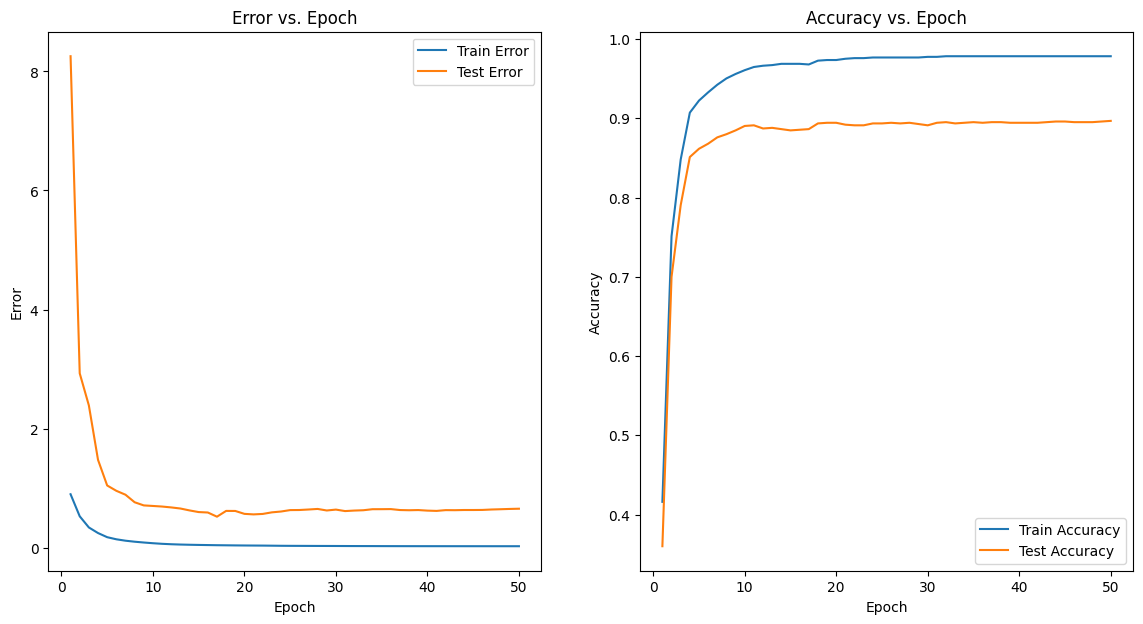

In [35]:
nn1 = NeuralNetwork(input_size=784,learning_rate=0.05,hidden_size=300)
nn1.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn1.plot_errors_accuracies()

(784, 1250)

Epoch 1 Completed with average error 1.117, Train Accuracy: %23.280, Test Accuracy: %24.000
Epoch 2 Completed with average error 0.918, Train Accuracy: %22.480, Test Accuracy: %22.800
Epoch 3 Completed with average error 0.893, Train Accuracy: %21.440, Test Accuracy: %22.880
Epoch 4 Completed with average error 0.830, Train Accuracy: %31.040, Test Accuracy: %30.000
Epoch 5 Completed with average error 0.744, Train Accuracy: %52.320, Test Accuracy: %52.320
Epoch 6 Completed with average error 0.634, Train Accuracy: %63.440, Test Accuracy: %62.400
Epoch 7 Completed with average error 0.541, Train Accuracy: %66.320, Test Accuracy: %66.480
Epoch 8 Completed with average error 0.469, Train Accuracy: %69.680, Test Accuracy: %69.600
Epoch 9 Completed with average error 0.422, Train Accuracy: %73.760, Test Accuracy: %72.720
Epoch 10 Completed with average error 0.390, Train Accuracy: %77.760, Test Accuracy: %76.080
Epoch 11 Completed with average error 0.361, Train Accuracy: %82.320, Test Accu

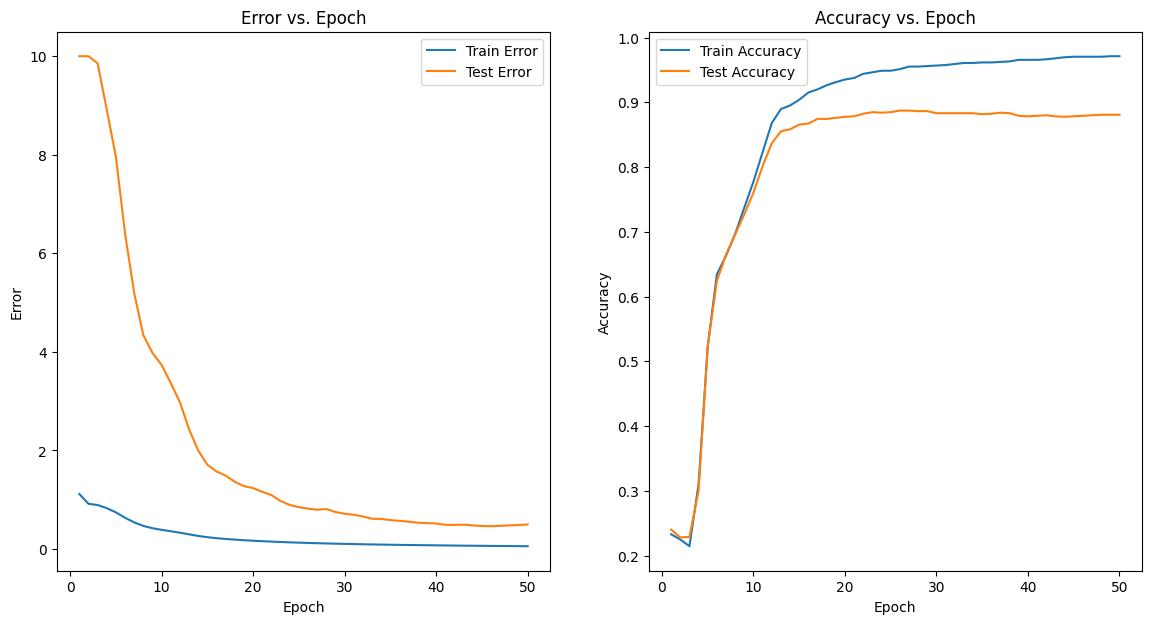

In [65]:
nn2 = NeuralNetwork(learning_rate=0.01,hidden_size=300)
nn2.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn2.plot_errors_accuracies()

In [36]:
nn3 = NeuralNetwork(learning_rate=0.05,hidden_size=500)
nn3.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn3.plot_errors_accuracies()

Epoch 1 Progessing..........

ValueError: shapes (500,784) and (1250,) not aligned: 784 (dim 1) != 1250 (dim 0)

Epoch 1 Completed with average error 1.089, Train Accuracy: %23.120, Test Accuracy: %23.840
Epoch 2 Completed with average error 0.910, Train Accuracy: %21.760, Test Accuracy: %22.880
Epoch 3 Completed with average error 0.864, Train Accuracy: %25.520, Test Accuracy: %25.600
Epoch 4 Completed with average error 0.775, Train Accuracy: %50.160, Test Accuracy: %49.520
Epoch 5 Completed with average error 0.659, Train Accuracy: %63.120, Test Accuracy: %62.560
Epoch 6 Completed with average error 0.554, Train Accuracy: %66.000, Test Accuracy: %66.080
Epoch 7 Completed with average error 0.475, Train Accuracy: %69.120, Test Accuracy: %69.680
Epoch 8 Completed with average error 0.426, Train Accuracy: %73.440, Test Accuracy: %73.520
Epoch 9 Completed with average error 0.391, Train Accuracy: %78.000, Test Accuracy: %76.160
Epoch 10 Completed with average error 0.361, Train Accuracy: %82.640, Test Accuracy: %80.480
Epoch 11 Completed with average error 0.329, Train Accuracy: %87.440, Test Accu

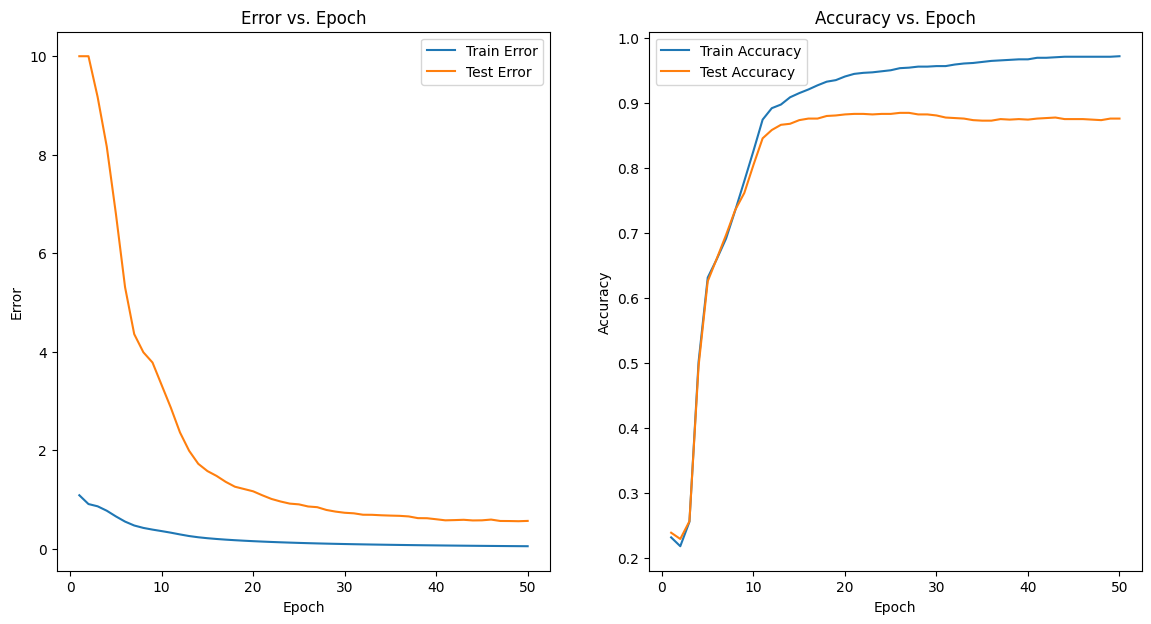

In [53]:
nn4 = NeuralNetwork(learning_rate=0.01,hidden_size=500)
nn4.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn4.plot_errors_accuracies()

Epoch 1 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.560
Epoch 2 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.560
Epoch 3 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.560
Epoch 4 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.480
Epoch 5 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.480
Epoch 6 Completed with average error 2.500, Train Accuracy: %9.360, Test Accuracy: %12.480
Epoch 7 Completed with average error 2.500, Train Accuracy: %9.440, Test Accuracy: %12.400
Epoch 8 Completed with average error 2.500, Train Accuracy: %9.440, Test Accuracy: %12.320
Epoch 9 Completed with average error 2.500, Train Accuracy: %9.440, Test Accuracy: %12.320
Epoch 10 Completed with average error 2.500, Train Accuracy: %9.520, Test Accuracy: %12.320
Epoch 11 Completed with average error 2.500, Train Accuracy: %9.600, Test Accuracy: %12.3

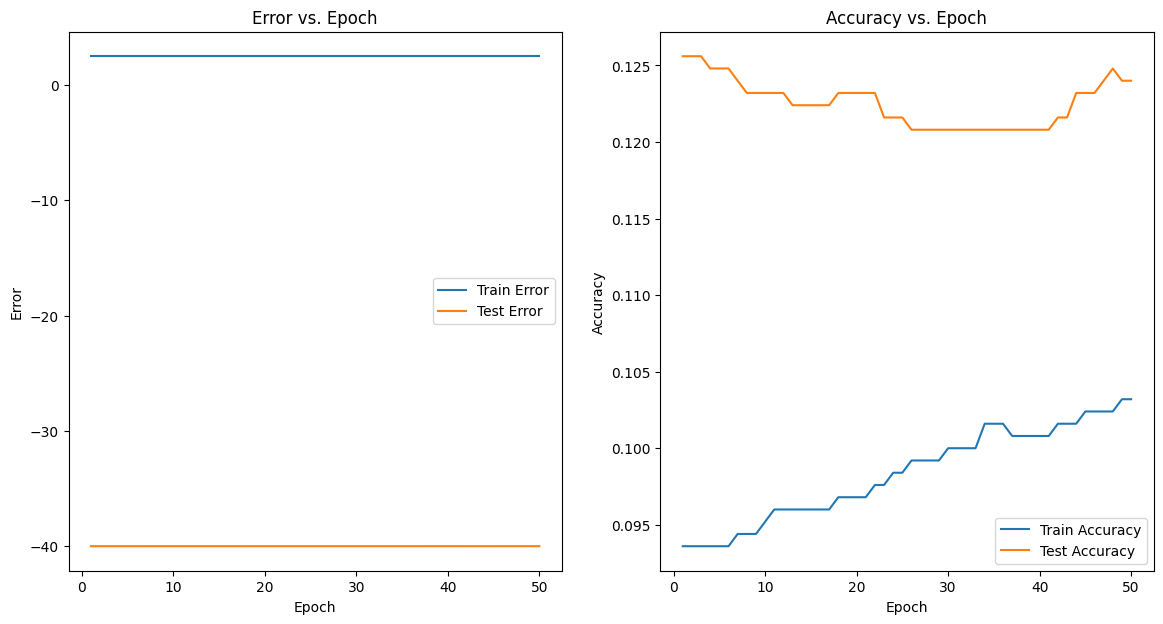

In [47]:
nn5 = NeuralNetwork2(input_size=140,learning_rate=0.05,hidden_size=300)
nn5.train(PCA_selected2, Y_train_1250, PCA_selected3, Y_test_1250)
nn5.plot_errors_accuracies()

Epoch 1 completed with average error 1.1136431647251441
Epoch 2 completed with average error 0.912717718164107
Epoch 3 completed with average error 0.8729196072270208
Epoch 4 completed with average error 0.7978758195945379
Epoch 5 completed with average error 0.7217586360776178
Epoch 6 completed with average error 0.6242671159302773
Epoch 7 completed with average error 0.5259202034808308
Epoch 8 completed with average error 0.44863185930843286
Epoch 9 completed with average error 0.3976457350897938
Epoch 10 completed with average error 0.36315952592116263
Epoch 11 completed with average error 0.3371205922037065
Epoch 12 completed with average error 0.31578894929096374
Epoch 13 completed with average error 0.2971337620250231
Epoch 14 completed with average error 0.28010184711898417
Epoch 15 completed with average error 0.26395435201423134
Epoch 16 completed with average error 0.24748293624351678
Epoch 17 completed with average error 0.22880997854740975
Epoch 18 completed with average er

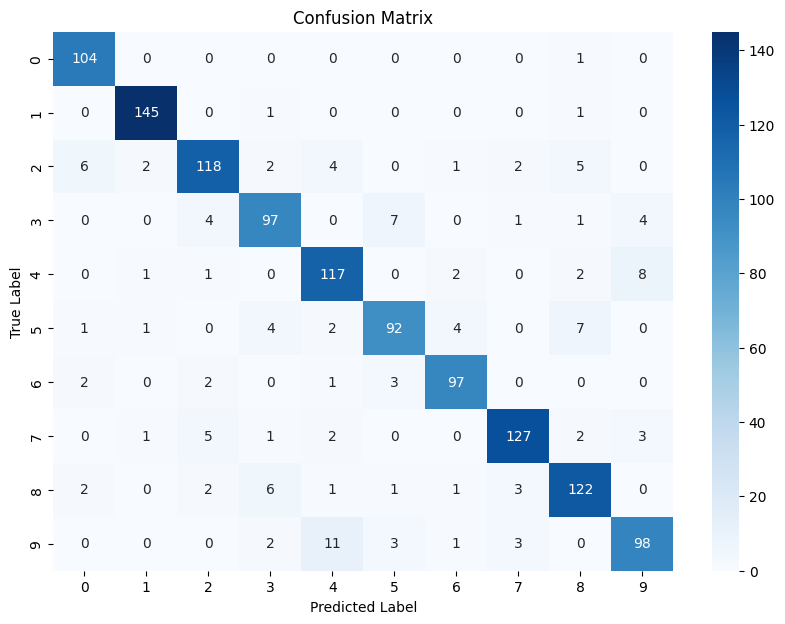

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit  # Sigmoid function

class NeuralNetwork_confus:
    def __init__(self, input_size=784, hidden_size=300, output_size=10, learning_rate=0.01, epochs=50, batch_size=1250):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.01, 0.01, size=(hidden_size, input_size))
        self.weights_hidden_output = np.random.uniform(-0.01, 0.01, size=(output_size, hidden_size))

    def relu_activation(self, x):
        return np.maximum(x, 0)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return expit(x)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def desired_output(self, label):
        d = np.zeros((self.output_size, 1))
        d[label] = 1
        return d

    def find_error(self, output, desired):
        return desired - output

    def forward_pass(self, inputs):
        hidden_inputs = np.dot(self.weights_input_hidden, inputs)
        hidden_outputs = self.relu_activation(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid_activation(final_inputs)
        return hidden_outputs, final_outputs

    def backpropagation(self, inputs, label):
        hidden_outputs, final_outputs = self.forward_pass(inputs)
        desired = self.desired_output(label)
        error = self.find_error(final_outputs, desired)

        # Output layer gradients
        output_deltas = error * self.sigmoid_derivative(final_outputs)
        hidden_deltas = np.dot(self.weights_hidden_output.T, output_deltas) * self.relu_derivative(hidden_outputs)

        # Update weights
        self.weights_hidden_output += self.learning_rate * np.dot(output_deltas, hidden_outputs.T)
        self.weights_input_hidden += self.learning_rate * np.dot(hidden_deltas, inputs.T)

        return np.sum(error**2)

    def train(self, X_train, Y_train):
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(self.batch_size):
                inputs = np.reshape(X_train[i], (784, 1))/255  # Adjust based on your data format
                label = Y_train[i]
                total_error += self.backpropagation(inputs, label)
            avg_error = total_error / self.batch_size
            print(f'Epoch {epoch+1} completed with average error {avg_error}')

    def test(self, X_test, Y_test):
        confusion_matrix = np.zeros((self.output_size, self.output_size), dtype=int)
        total_error = 0
        num_correct = 0
        for i in range(len(Y_test)):
            inputs = np.reshape(X_test[i], (784, 1))/255  # Adjust based on your data format
            label = Y_test[i]
            _, predictions = self.forward_pass(inputs)
            predicted_label = np.argmax(predictions)
            if predicted_label == label:
                num_correct += 1
            confusion_matrix[label, predicted_label] += 1
            total_error += self.find_error(predictions, self.desired_output(label))

        accuracy = num_correct / len(Y_test)
        print(f'Accuracy: {accuracy*100:.2f}%')

        # Graph the confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

# Example instantiation and use of the class
input_size = 784  # For MNIST 28x28 images
hidden_size = 300
output_size = 10
learning_rate = 0.01
epochs = 50
batch_size = 1250

nn = NeuralNetwork_confus(input_size, hidden_size, output_size, learning_rate, epochs, batch_size)
# Assuming X_train, Y_train, X_test, Y_test are already defined and preprocessed
nn.train(X_train_1250.T, Y_train_1250)
nn.test(X_test_1250.T, Y_test_1250)


In [56]:
nn10 = NeuralNetwork(input_size=784,learning_rate=0.05,hidden_size=300)
nn10.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn10.test(X_test_1250.T, Y_test_1250)

Epoch 1 Completed with average error 0.902, Train Accuracy: %43.520, Test Accuracy: %38.480
Epoch 2 Completed with average error 0.524, Train Accuracy: %75.040, Test Accuracy: %69.440
Epoch 3 Completed with average error 0.340, Train Accuracy: %84.960, Test Accuracy: %78.720
Epoch 4 Completed with average error 0.249, Train Accuracy: %90.640, Test Accuracy: %85.040
Epoch 5 Completed with average error 0.177, Train Accuracy: %92.160, Test Accuracy: %86.240
Epoch 6 Completed with average error 0.140, Train Accuracy: %93.680, Test Accuracy: %86.800
Epoch 7 Completed with average error 0.115, Train Accuracy: %94.480, Test Accuracy: %87.040
Epoch 8 Completed with average error 0.097, Train Accuracy: %95.040, Test Accuracy: %88.160
Epoch 9 Completed with average error 0.084, Train Accuracy: %95.920, Test Accuracy: %88.320
Epoch 10 Completed with average error 0.072, Train Accuracy: %96.160, Test Accuracy: %88.640
Epoch 11 Completed with average error 0.063, Train Accuracy: %96.720, Test Accu

(0.5305037542147426, 0.9008)

In [57]:
nn11 = NeuralNetwork(input_size=784,learning_rate=0.01,hidden_size=300)
nn11.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)ax
nn11.test(X_test_1250.T, Y_test_1250)

Epoch 1 Completed with average error 1.108, Train Accuracy: %15.360, Test Accuracy: %13.360
Epoch 2 Completed with average error 0.913, Train Accuracy: %25.760, Test Accuracy: %22.880
Epoch 3 Completed with average error 0.874, Train Accuracy: %39.600, Test Accuracy: %33.760
Epoch 4 Completed with average error 0.797, Train Accuracy: %41.920, Test Accuracy: %36.640
Epoch 5 Completed with average error 0.711, Train Accuracy: %50.480, Test Accuracy: %45.680
Epoch 6 Completed with average error 0.608, Train Accuracy: %65.040, Test Accuracy: %61.040
Epoch 7 Completed with average error 0.517, Train Accuracy: %73.120, Test Accuracy: %68.000
Epoch 8 Completed with average error 0.445, Train Accuracy: %76.160, Test Accuracy: %70.800
Epoch 9 Completed with average error 0.397, Train Accuracy: %78.320, Test Accuracy: %72.480
Epoch 10 Completed with average error 0.364, Train Accuracy: %79.600, Test Accuracy: %73.680
Epoch 11 Completed with average error 0.339, Train Accuracy: %80.640, Test Accu

(0.5549737092777713, 0.8872)

In [58]:
nn12 = NeuralNetwork(input_size=784,learning_rate=0.01,hidden_size=500)
nn12.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn12.test(X_test_1250.T, Y_test_1250)

Epoch 1 Completed with average error 1.088, Train Accuracy: %16.960, Test Accuracy: %14.560
Epoch 2 Completed with average error 0.906, Train Accuracy: %26.720, Test Accuracy: %22.800
Epoch 3 Completed with average error 0.848, Train Accuracy: %38.720, Test Accuracy: %32.560
Epoch 4 Completed with average error 0.757, Train Accuracy: %47.360, Test Accuracy: %42.320
Epoch 5 Completed with average error 0.659, Train Accuracy: %58.880, Test Accuracy: %56.000
Epoch 6 Completed with average error 0.551, Train Accuracy: %70.000, Test Accuracy: %65.200
Epoch 7 Completed with average error 0.464, Train Accuracy: %74.800, Test Accuracy: %69.680
Epoch 8 Completed with average error 0.408, Train Accuracy: %78.480, Test Accuracy: %71.760
Epoch 9 Completed with average error 0.371, Train Accuracy: %80.400, Test Accuracy: %73.760
Epoch 10 Completed with average error 0.342, Train Accuracy: %81.360, Test Accuracy: %74.880
Epoch 11 Completed with average error 0.319, Train Accuracy: %82.320, Test Accu

(0.6547295049462432, 0.8872)

In [ ]:
nn13 = NeuralNetwork(input_size=784,learning_rate=0.05,hidden_size=500)
nn13.train(X_train_1250.T, Y_train_1250, X_test_1250.T, Y_test_1250)
nn13.test(X_test_1250.T, Y_test_1250)

Epoch 1 Completed with average error 0.873, Train Accuracy: %52.640, Test Accuracy: %49.280
Epoch 2 Completed with average error 0.481, Train Accuracy: %76.400, Test Accuracy: %71.280
Epoch 3 Completed with average error 0.320, Train Accuracy: %86.560, Test Accuracy: %80.960
Epoch 4 Completed with average error 0.228, Train Accuracy: %90.960, Test Accuracy: %85.280
Epoch 5 Completed with average error 0.165, Train Accuracy: %92.720, Test Accuracy: %86.480
Epoch 6 Completed with average error 0.132, Train Accuracy: %93.600, Test Accuracy: %87.280
Epoch 7 Completed with average error 0.110, Train Accuracy: %94.400, Test Accuracy: %87.840
Epoch 8 Completed with average error 0.094, Train Accuracy: %95.360, Test Accuracy: %88.000
Epoch 9 Completed with average error 0.079, Train Accuracy: %95.760, Test Accuracy: %88.480
Epoch 10 Completed with average error 0.069, Train Accuracy: %95.920, Test Accuracy: %88.720
Epoch 11 Completed with average error 0.061, Train Accuracy: %96.400, Test Accu

# **PCA**

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Stand_X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution Before PCA')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(PCA_selected2.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution After PCA')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(300,100)
learning_rate=0.01
epochs=50
batch_size=1250
layer_num=300
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(300,100)
learning_rate=0.05
epochs=50
batch_size=1250
layer_num=300
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(300,100)
learning_rate=0.09
epochs=50
batch_size=1250
layer_num=300
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(500,100)
learning_rate=0.01
epochs=50
batch_size=1250
layer_num=500
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(500,100)
learning_rate=0.05
epochs=50
batch_size=1250
layer_num=500
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)

In [ ]:
weights_hidden2, weights_output2=initialize_weights2(500,100)
learning_rate=0.09
epochs=50
batch_size=1250
layer_num=500
train3(PCA_selected2,Y_train_1250,PCA_selected3 ,Y_test_1250,weights_output2, weights_hidden2,activation_hidden_1, activation_output_1, learning_rate,layer_num,batch_size,epochs)



# > **KNN**




In [ ]:
class KNN1:
    def __init__(self, k=3):
        self.k = k#k neighbours

    def fit(self, X_train, Y_train):#fit the data
        self.X_train = X_train
        self.Y_train = Y_train

    def euc_distance(self, x1, x2):#euclidean distance
        return np.linalg.norm(x1 - x2)

    def forward(self, X, Y):
        y_predict = []#prediction list
        for x in X:
            distances = [self.euc_distance(x, x_train) for x_train in self.X_train]#list of euclidean distances of test data over train data
            indices = np.argsort(distances)[:self.k][:-1]#smalles kth elements of sorted distance list
            knearest_labels = [self.Y_train[i] for i in indices]#get the labels of interested indices
            most_common_label = Counter(knearest_labels).most_common(1)[0][0]#count the which labels appears most
            y_predict.append(most_common_label)#at the prediction list
        return np.array(y_predict)#return as array

    def acc(self, x, y):
        predictions = self.forward(x, y)#forward test data and get predictions
        acc = np.sum(predictions == y) / len(y)#check accuracy
        return acc

In [ ]:
knn1=KNN1()
knn1.fit(X_train1[:5000],Y_train1[:5000])
knn1.acc(X_test1[:200],Y_test1[:200])

0.92

In [ ]:
from sklearn.neighbors import KNeighborsClassifier#check the library algorithm with same data just to see dataset is working and workable
knn3 = KNeighborsClassifier()
knn3.fit(X_train,y_train)
y=knn3.predict(X_test)
x=np.sum(y_test==y_test)/10000
print(x)

1.0


# Random Forest

## Decision Tree

In [3]:
class DecisionTree:
    def __init__(self, max_depth=None, max_features=None):
        self.max_depth = max_depth#maximum depth of tree
        self.max_features = max_features

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Check termination conditions
        if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1:
            return {'class': np.argmax(np.bincount(y)), 'num_samples': num_samples}

        # Find the best split
        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is None:
            return {'class': np.argmax(np.bincount(y)), 'num_samples': num_samples}

        # Split the data
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices
        left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, left_labels, right_labels):
        total_samples = len(left_labels) + len(right_labels)
        gini_left = 1.0 - sum((np.sum(left_labels == c) / len(left_labels)) ** 2 for c in np.unique(left_labels))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / len(right_labels)) ** 2 for c in np.unique(right_labels))
        gini = (len(left_labels) / total_samples) * gini_left + (len(right_labels) / total_samples) * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature']] < tree['threshold']:
            return self._predict_one(x, tree['left'])
        else:
            return self._predict_one(x, tree['right'])

# X_train1=X_train1/255
# X_test1=X_test1/255
# X_train_subset, y_train_subset = X_train1[:1000],Y_train1[:1000]
# X_test_subset, y_test_subset =X_test1[:100],Y_test1[:100]
# # Train the decision tree
# dt = DecisionTree(max_depth=10)
# dt.fit(X_train_subset, y_train_subset)

# # Make predictions
# y_pred = dt.predict(X_test_subset)

# # Calculate accuracy
# accuracy = np.mean(y_pred == y_test_subset)
# print("Accuracy:", accuracy)

## Random Forest


In [4]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators#lenght of tree list
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, max_features=self.max_features)#create trees
            sample_indices = np.random.choice(len(X), len(X), replace=True)#select random data
            X_sample, y_sample = X[sample_indices], y[sample_indices]
            tree.fit(X_sample, y_sample)#fit data to decision trees
            self.trees.append(tree)#append tree to trees list

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Aggregate predictions using voting
        y_pred = np.array([Counter(preds).most_common(1)[0][0] for preds in predictions.T])
        return y_pred



In [6]:
X_train1=X_train1/255#normalize data
X_test1=X_test1/255
X_train_subset, y_train_subset = X_train1[:5000], Y_train1[:5000]
X_test_subset, y_test_subset = X_test1[:500], Y_test1[:500]

## Train Random Forest

In [7]:
rf1 = RandomForest(n_estimators=8, max_depth=10, max_features=100)
rf1.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred1 = rf1.predict(X_test_subset)

# Calculate accuracy
accuracy1 = np.mean(y_pred1 == y_test_subset)


KeyboardInterrupt: 

In [ ]:
print("Accuracy: %", 100*accuracy1)

In [ ]:
rf2= RandomForest(n_estimators=9, max_depth=10, max_features=100)
rf2.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred2 = rf2.predict(X_test_subset)

# Calculate accuracy
accuracy2 = np.mean(y_pred2 == y_test_subset)
print("Accuracy: %", 100*accuracy2)

In [ ]:
rf3=RandomForest(n_estimators=10, max_depth=10, max_features=100)
rf3.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred3 = rf3.predict(X_test_subset)

# Calculate accuracy
accuracy3 = np.mean(y_pred3 == y_test_subset)
print("Accuracy: %", 100*accuracy3)

In [ ]:
rf4=RandomForest(n_estimators=10, max_depth=10, max_features=None)
rf4.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred4 = rf4.predict(X_test_subset)

# Calculate accuracy
accuracy4 = np.mean(y_pred4 == y_test_subset)
print("Accuracy: %", 100*accuracy4)

In [ ]:
rf5 = RandomForest(n_estimators=8, max_depth=10, max_features=None)
rf5.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred5 = rf5.predict(X_test_subset)

# Calculate accuracy
accuracy5 = np.mean(y_pred5 == y_test_subset)
print("Accuracy: %", 100*accuracy5)

In [ ]:
rf6= RandomForest(n_estimators=9, max_depth=10, max_features=None)
rf6.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred6 = rf6.predict(X_test_subset)

# Calculate accuracy
accuracy6 = np.mean(y_pred6 == y_test_subset)
print("Accuracy: %", 100*accuracy6)

In [ ]:
rf7=RandomForest(n_estimators=20, max_depth=10, max_features=None)
rf7.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred7 = rf7.predict(X_test_subset)

# Calculate accuracy
accuracy7 = np.mean(y_pre7 == y_test_subset)
print("Accuracy: %", 100*accuracy7)

In [ ]:

rf8 = RandomForest(n_estimators=8, max_depth=10, max_features=100)
rf8.fit(PCA_selected2, Y_train_1250)

# Make predictions
y_pred8 = rf1.predict(PCA_selected3)

# Calculate accuracy
accuracy8 = np.mean(y_pred1 == y_test_subset)
